In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: TU
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


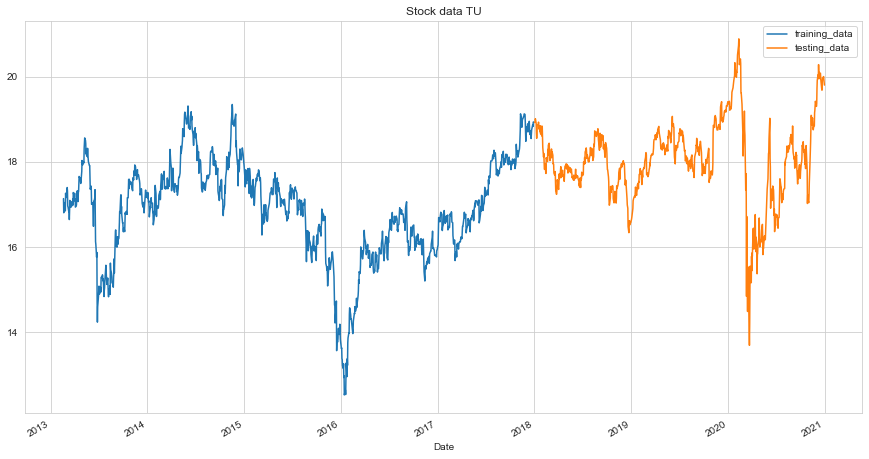

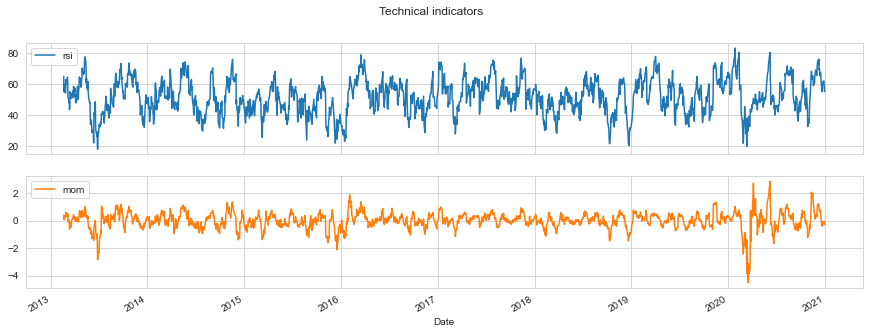

In [2]:
stock_name = 'tu'.upper()
industry = 'Communication Services'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1122.04, duration: 0:00:00.345080
episode: 2/2000, episode end value: 1066.70, duration: 0:00:00.313067
episode: 3/2000, episode end value: 1063.71, duration: 0:00:00.311072
episode: 4/2000, episode end value: 1066.06, duration: 0:00:00.306071
episode: 5/2000, episode end value: 1069.37, duration: 0:00:00.306074
episode: 6/2000, episode end value: 1069.71, duration: 0:00:00.310071
episode: 7/2000, episode end value: 1086.88, duration: 0:00:00.305067
episode: 8/2000, episode end value: 1061.34, duration: 0:00:00.354086
episode: 9/2000, episode end value: 1068.24, duration: 0:00:00.381086
episode: 10/2000, episode end value: 1066.06, duration: 0:00:00.385086
episode: 11/2000, episode end value: 1070.58, duration: 0:00:00.407094
episode: 12/2000, episode end value: 1080.76, duration: 0:00:00.350076
episode: 13/2000, episode end value: 1076.08, duration: 0:00:00.434100
episode: 14/2000, episode end value: 1094.39, duration: 0:00:00.411090
episode: 15/200

episode: 117/2000, episode end value: 1087.43, duration: 0:00:00.337079
episode: 118/2000, episode end value: 1101.60, duration: 0:00:00.385085
episode: 119/2000, episode end value: 1138.29, duration: 0:00:00.363082
episode: 120/2000, episode end value: 1097.99, duration: 0:00:00.321073
episode: 121/2000, episode end value: 1130.77, duration: 0:00:00.320077
episode: 122/2000, episode end value: 1114.80, duration: 0:00:00.298066
episode: 123/2000, episode end value: 1067.53, duration: 0:00:00.354079
episode: 124/2000, episode end value: 1083.36, duration: 0:00:00.419100
episode: 125/2000, episode end value: 1124.78, duration: 0:00:00.436095
episode: 126/2000, episode end value: 1148.72, duration: 0:00:00.410096
episode: 127/2000, episode end value: 1104.47, duration: 0:00:00.377083
episode: 128/2000, episode end value: 1099.08, duration: 0:00:00.334075
episode: 129/2000, episode end value: 1147.65, duration: 0:00:00.391092
episode: 130/2000, episode end value: 1143.82, duration: 0:00:00

episode: 231/2000, episode end value: 1086.83, duration: 0:00:00.330072
episode: 232/2000, episode end value: 1134.86, duration: 0:00:00.309072
episode: 233/2000, episode end value: 1133.27, duration: 0:00:00.379085
episode: 234/2000, episode end value: 1174.71, duration: 0:00:00.300071
episode: 235/2000, episode end value: 1094.86, duration: 0:00:00.331078
episode: 236/2000, episode end value: 1130.58, duration: 0:00:00.412091
episode: 237/2000, episode end value: 1132.73, duration: 0:00:00.361075
episode: 238/2000, episode end value: 1100.14, duration: 0:00:00.410092
episode: 239/2000, episode end value: 1091.68, duration: 0:00:00.292063
episode: 240/2000, episode end value: 1092.90, duration: 0:00:00.447104
episode: 241/2000, episode end value: 1157.79, duration: 0:00:00.371078
episode: 242/2000, episode end value: 1109.30, duration: 0:00:00.396093
episode: 243/2000, episode end value: 1104.49, duration: 0:00:00.407101
episode: 244/2000, episode end value: 1122.93, duration: 0:00:00

episode: 345/2000, episode end value: 1123.37, duration: 0:00:00.457101
episode: 346/2000, episode end value: 1105.55, duration: 0:00:00.447826
episode: 347/2000, episode end value: 1109.98, duration: 0:00:00.441919
episode: 348/2000, episode end value: 1133.79, duration: 0:00:00.371082
episode: 349/2000, episode end value: 1103.15, duration: 0:00:00.362081
episode: 350/2000, episode end value: 1112.14, duration: 0:00:00.387088
episode: 351/2000, episode end value: 1100.91, duration: 0:00:00.348075
episode: 352/2000, episode end value: 1074.21, duration: 0:00:00.342075
episode: 353/2000, episode end value: 1048.34, duration: 0:00:00.346080
episode: 354/2000, episode end value: 1099.81, duration: 0:00:00.382084
episode: 355/2000, episode end value: 1101.67, duration: 0:00:00.371087
episode: 356/2000, episode end value: 1146.91, duration: 0:00:00.456098
episode: 357/2000, episode end value: 1111.09, duration: 0:00:00.455494
episode: 358/2000, episode end value: 1116.13, duration: 0:00:00

episode: 459/2000, episode end value: 1073.20, duration: 0:00:00.443097
episode: 460/2000, episode end value: 1142.65, duration: 0:00:00.402090
episode: 461/2000, episode end value: 1140.00, duration: 0:00:00.405091
episode: 462/2000, episode end value: 1125.56, duration: 0:00:00.373083
episode: 463/2000, episode end value: 1120.48, duration: 0:00:00.451102
episode: 464/2000, episode end value: 1110.58, duration: 0:00:00.439100
episode: 465/2000, episode end value: 1147.10, duration: 0:00:00.405094
episode: 466/2000, episode end value: 1109.54, duration: 0:00:00.346077
episode: 467/2000, episode end value: 1092.60, duration: 0:00:00.406091
episode: 468/2000, episode end value: 1099.57, duration: 0:00:00.454102
episode: 469/2000, episode end value: 1100.04, duration: 0:00:00.421097
episode: 470/2000, episode end value: 1096.73, duration: 0:00:00.433100
episode: 471/2000, episode end value: 1123.46, duration: 0:00:00.341073
episode: 472/2000, episode end value: 1151.00, duration: 0:00:00

episode: 573/2000, episode end value: 1111.60, duration: 0:00:00.395092
episode: 574/2000, episode end value: 1082.59, duration: 0:00:00.383080
episode: 575/2000, episode end value: 1134.93, duration: 0:00:00.324078
episode: 576/2000, episode end value: 1122.06, duration: 0:00:00.321072
episode: 577/2000, episode end value: 1106.58, duration: 0:00:00.333074
episode: 578/2000, episode end value: 1126.73, duration: 0:00:00.362081
episode: 579/2000, episode end value: 1099.91, duration: 0:00:00.422094
episode: 580/2000, episode end value: 1102.19, duration: 0:00:00.385085
episode: 581/2000, episode end value: 1086.35, duration: 0:00:00.406094
episode: 582/2000, episode end value: 1134.07, duration: 0:00:00.345079
episode: 583/2000, episode end value: 1141.78, duration: 0:00:00.376085
episode: 584/2000, episode end value: 1094.34, duration: 0:00:00.399088
episode: 585/2000, episode end value: 1091.76, duration: 0:00:00.361083
episode: 586/2000, episode end value: 1121.81, duration: 0:00:00

episode: 687/2000, episode end value: 1090.80, duration: 0:00:00.353082
episode: 688/2000, episode end value: 1117.34, duration: 0:00:00.385092
episode: 689/2000, episode end value: 1118.80, duration: 0:00:00.437096
episode: 690/2000, episode end value: 1110.87, duration: 0:00:00.447101
episode: 691/2000, episode end value: 1105.46, duration: 0:00:00.469495
episode: 692/2000, episode end value: 1101.68, duration: 0:00:00.385640
episode: 693/2000, episode end value: 1095.79, duration: 0:00:00.389086
episode: 694/2000, episode end value: 1112.26, duration: 0:00:00.395090
episode: 695/2000, episode end value: 1095.87, duration: 0:00:00.401096
episode: 696/2000, episode end value: 1098.08, duration: 0:00:00.447095
episode: 697/2000, episode end value: 1102.30, duration: 0:00:00.361079
episode: 698/2000, episode end value: 1138.90, duration: 0:00:00.339084
episode: 699/2000, episode end value: 1089.22, duration: 0:00:00.353076
episode: 700/2000, episode end value: 1120.35, duration: 0:00:00

episode: 801/2000, episode end value: 1105.80, duration: 0:00:00.435057
episode: 802/2000, episode end value: 1113.34, duration: 0:00:00.522120
episode: 803/2000, episode end value: 1114.04, duration: 0:00:00.519252
episode: 804/2000, episode end value: 1105.48, duration: 0:00:00.438683
episode: 805/2000, episode end value: 1122.07, duration: 0:00:00.386084
episode: 806/2000, episode end value: 1123.77, duration: 0:00:00.348081
episode: 807/2000, episode end value: 1095.82, duration: 0:00:00.470103
episode: 808/2000, episode end value: 1123.01, duration: 0:00:00.453101
episode: 809/2000, episode end value: 1107.58, duration: 0:00:00.424094
episode: 810/2000, episode end value: 1064.48, duration: 0:00:00.322076
episode: 811/2000, episode end value: 1138.83, duration: 0:00:00.352078
episode: 812/2000, episode end value: 1147.76, duration: 0:00:00.368575
episode: 813/2000, episode end value: 1148.44, duration: 0:00:00.317153
episode: 814/2000, episode end value: 1091.70, duration: 0:00:00

episode: 915/2000, episode end value: 1117.79, duration: 0:00:00.324075
episode: 916/2000, episode end value: 1135.16, duration: 0:00:00.412097
episode: 917/2000, episode end value: 1120.59, duration: 0:00:00.407090
episode: 918/2000, episode end value: 1107.02, duration: 0:00:00.376083
episode: 919/2000, episode end value: 1138.30, duration: 0:00:00.347076
episode: 920/2000, episode end value: 1134.99, duration: 0:00:00.374083
episode: 921/2000, episode end value: 1077.13, duration: 0:00:00.363087
episode: 922/2000, episode end value: 1137.46, duration: 0:00:00.351081
episode: 923/2000, episode end value: 1113.68, duration: 0:00:00.360079
episode: 924/2000, episode end value: 1116.70, duration: 0:00:00.331076
episode: 925/2000, episode end value: 1121.40, duration: 0:00:00.308069
episode: 926/2000, episode end value: 1083.70, duration: 0:00:00.307068
episode: 927/2000, episode end value: 1124.08, duration: 0:00:00.323074
episode: 928/2000, episode end value: 1152.97, duration: 0:00:00

episode: 1029/2000, episode end value: 1126.38, duration: 0:00:00.425091
episode: 1030/2000, episode end value: 1100.15, duration: 0:00:00.462102
episode: 1031/2000, episode end value: 1105.07, duration: 0:00:00.423097
episode: 1032/2000, episode end value: 1130.53, duration: 0:00:00.396088
episode: 1033/2000, episode end value: 1137.82, duration: 0:00:00.417093
episode: 1034/2000, episode end value: 1194.04, duration: 0:00:00.334078
episode: 1035/2000, episode end value: 1090.49, duration: 0:00:00.435096
episode: 1036/2000, episode end value: 1104.83, duration: 0:00:00.402092
episode: 1037/2000, episode end value: 1164.47, duration: 0:00:00.484108
episode: 1038/2000, episode end value: 1116.11, duration: 0:00:00.509114
episode: 1039/2000, episode end value: 1113.27, duration: 0:00:00.452097
episode: 1040/2000, episode end value: 1112.12, duration: 0:00:00.426093
episode: 1041/2000, episode end value: 1105.59, duration: 0:00:00.359081
episode: 1042/2000, episode end value: 1117.48, dur

episode: 1142/2000, episode end value: 1137.07, duration: 0:00:00.289064
episode: 1143/2000, episode end value: 1130.81, duration: 0:00:00.296069
episode: 1144/2000, episode end value: 1129.63, duration: 0:00:00.307071
episode: 1145/2000, episode end value: 1147.76, duration: 0:00:00.292062
episode: 1146/2000, episode end value: 1089.88, duration: 0:00:00.320075
episode: 1147/2000, episode end value: 1079.24, duration: 0:00:00.315073
episode: 1148/2000, episode end value: 1092.07, duration: 0:00:00.323072
episode: 1149/2000, episode end value: 1141.53, duration: 0:00:00.274057
episode: 1150/2000, episode end value: 1142.27, duration: 0:00:00.311073
episode: 1151/2000, episode end value: 1200.31, duration: 0:00:00.323071
episode: 1152/2000, episode end value: 1167.14, duration: 0:00:00.328070
episode: 1153/2000, episode end value: 1158.17, duration: 0:00:00.345104
episode: 1154/2000, episode end value: 1135.38, duration: 0:00:00.324056
episode: 1155/2000, episode end value: 1144.20, dur

episode: 1255/2000, episode end value: 1083.77, duration: 0:00:00.332074
episode: 1256/2000, episode end value: 1120.54, duration: 0:00:00.327079
episode: 1257/2000, episode end value: 1110.76, duration: 0:00:00.325071
episode: 1258/2000, episode end value: 1138.36, duration: 0:00:00.327072
episode: 1259/2000, episode end value: 1125.22, duration: 0:00:00.400090
episode: 1260/2000, episode end value: 1097.25, duration: 0:00:00.374087
episode: 1261/2000, episode end value: 1105.09, duration: 0:00:00.367081
episode: 1262/2000, episode end value: 1102.21, duration: 0:00:00.380084
episode: 1263/2000, episode end value: 1134.31, duration: 0:00:00.322073
episode: 1264/2000, episode end value: 1108.75, duration: 0:00:00.379088
episode: 1265/2000, episode end value: 1090.19, duration: 0:00:00.314076
episode: 1266/2000, episode end value: 1143.75, duration: 0:00:00.324069
episode: 1267/2000, episode end value: 1085.51, duration: 0:00:00.274064
episode: 1268/2000, episode end value: 1097.00, dur

episode: 1368/2000, episode end value: 1102.29, duration: 0:00:00.343081
episode: 1369/2000, episode end value: 1102.31, duration: 0:00:00.346077
episode: 1370/2000, episode end value: 1079.90, duration: 0:00:00.283065
episode: 1371/2000, episode end value: 1107.77, duration: 0:00:00.318071
episode: 1372/2000, episode end value: 1140.13, duration: 0:00:00.336075
episode: 1373/2000, episode end value: 1132.88, duration: 0:00:00.290080
episode: 1374/2000, episode end value: 1137.91, duration: 0:00:00.301069
episode: 1375/2000, episode end value: 1141.44, duration: 0:00:00.272056
episode: 1376/2000, episode end value: 1092.47, duration: 0:00:00.284064
episode: 1377/2000, episode end value: 1117.80, duration: 0:00:00.264058
episode: 1378/2000, episode end value: 1156.58, duration: 0:00:00.260059
episode: 1379/2000, episode end value: 1087.64, duration: 0:00:00.280060
episode: 1380/2000, episode end value: 1096.71, duration: 0:00:00.282065
episode: 1381/2000, episode end value: 1121.51, dur

episode: 1481/2000, episode end value: 1115.35, duration: 0:00:00.284064
episode: 1482/2000, episode end value: 1165.29, duration: 0:00:00.329072
episode: 1483/2000, episode end value: 1078.16, duration: 0:00:00.267062
episode: 1484/2000, episode end value: 1140.39, duration: 0:00:00.285063
episode: 1485/2000, episode end value: 1094.13, duration: 0:00:00.287065
episode: 1486/2000, episode end value: 1123.18, duration: 0:00:00.338074
episode: 1487/2000, episode end value: 1110.00, duration: 0:00:00.322070
episode: 1488/2000, episode end value: 1098.52, duration: 0:00:00.310070
episode: 1489/2000, episode end value: 1112.89, duration: 0:00:00.314070
episode: 1490/2000, episode end value: 1106.17, duration: 0:00:00.326073
episode: 1491/2000, episode end value: 1104.61, duration: 0:00:00.307066
episode: 1492/2000, episode end value: 1136.75, duration: 0:00:00.290066
episode: 1493/2000, episode end value: 1101.73, duration: 0:00:00.288064
episode: 1494/2000, episode end value: 1157.46, dur

episode: 1594/2000, episode end value: 1108.65, duration: 0:00:00.288063
episode: 1595/2000, episode end value: 1126.76, duration: 0:00:00.313070
episode: 1596/2000, episode end value: 1112.99, duration: 0:00:00.292081
episode: 1597/2000, episode end value: 1127.06, duration: 0:00:00.306071
episode: 1598/2000, episode end value: 1101.25, duration: 0:00:00.311149
episode: 1599/2000, episode end value: 1121.00, duration: 0:00:00.379090
episode: 1600/2000, episode end value: 1123.07, duration: 0:00:00.365081
episode: 1601/2000, episode end value: 1114.57, duration: 0:00:00.355079
episode: 1602/2000, episode end value: 1124.90, duration: 0:00:00.315069
episode: 1603/2000, episode end value: 1155.08, duration: 0:00:00.322075
episode: 1604/2000, episode end value: 1144.42, duration: 0:00:00.266059
episode: 1605/2000, episode end value: 1090.20, duration: 0:00:00.307069
episode: 1606/2000, episode end value: 1092.77, duration: 0:00:00.275062
episode: 1607/2000, episode end value: 1098.34, dur

episode: 1707/2000, episode end value: 1085.73, duration: 0:00:00.310913
episode: 1708/2000, episode end value: 1061.11, duration: 0:00:00.283056
episode: 1709/2000, episode end value: 1115.53, duration: 0:00:00.270062
episode: 1710/2000, episode end value: 1064.24, duration: 0:00:00.294068
episode: 1711/2000, episode end value: 1088.74, duration: 0:00:00.298065
episode: 1712/2000, episode end value: 1076.80, duration: 0:00:00.366079
episode: 1713/2000, episode end value: 1102.02, duration: 0:00:00.277062
episode: 1714/2000, episode end value: 1065.97, duration: 0:00:00.282064
episode: 1715/2000, episode end value: 1108.80, duration: 0:00:00.296066
episode: 1716/2000, episode end value: 1089.41, duration: 0:00:00.298071
episode: 1717/2000, episode end value: 1085.21, duration: 0:00:00.326073
episode: 1718/2000, episode end value: 1141.03, duration: 0:00:00.319068
episode: 1719/2000, episode end value: 1084.96, duration: 0:00:00.344944
episode: 1720/2000, episode end value: 1146.79, dur

episode: 1820/2000, episode end value: 1115.61, duration: 0:00:00.292069
episode: 1821/2000, episode end value: 1114.20, duration: 0:00:00.270062
episode: 1822/2000, episode end value: 1146.34, duration: 0:00:00.244056
episode: 1823/2000, episode end value: 1108.60, duration: 0:00:00.252056
episode: 1824/2000, episode end value: 1136.01, duration: 0:00:00.239054
episode: 1825/2000, episode end value: 1129.10, duration: 0:00:00.275064
episode: 1826/2000, episode end value: 1108.37, duration: 0:00:00.291067
episode: 1827/2000, episode end value: 1110.38, duration: 0:00:00.312070
episode: 1828/2000, episode end value: 1113.71, duration: 0:00:00.303067
episode: 1829/2000, episode end value: 1088.40, duration: 0:00:00.305068
episode: 1830/2000, episode end value: 1195.89, duration: 0:00:00.324075
episode: 1831/2000, episode end value: 1110.33, duration: 0:00:00.276058
episode: 1832/2000, episode end value: 1083.69, duration: 0:00:00.307070
episode: 1833/2000, episode end value: 1091.30, dur

episode: 1933/2000, episode end value: 1068.16, duration: 0:00:00.287066
episode: 1934/2000, episode end value: 1150.80, duration: 0:00:00.276063
episode: 1935/2000, episode end value: 1096.66, duration: 0:00:00.347077
episode: 1936/2000, episode end value: 1116.99, duration: 0:00:00.309068
episode: 1937/2000, episode end value: 1110.22, duration: 0:00:00.378088
episode: 1938/2000, episode end value: 1100.80, duration: 0:00:00.332073
episode: 1939/2000, episode end value: 1095.11, duration: 0:00:00.296069
episode: 1940/2000, episode end value: 1114.91, duration: 0:00:00.293060
episode: 1941/2000, episode end value: 1080.91, duration: 0:00:00.301177
episode: 1942/2000, episode end value: 1192.13, duration: 0:00:00.293065
episode: 1943/2000, episode end value: 1088.63, duration: 0:00:00.359080
episode: 1944/2000, episode end value: 1114.11, duration: 0:00:00.287063
episode: 1945/2000, episode end value: 1115.09, duration: 0:00:00.340077
episode: 1946/2000, episode end value: 1109.02, dur

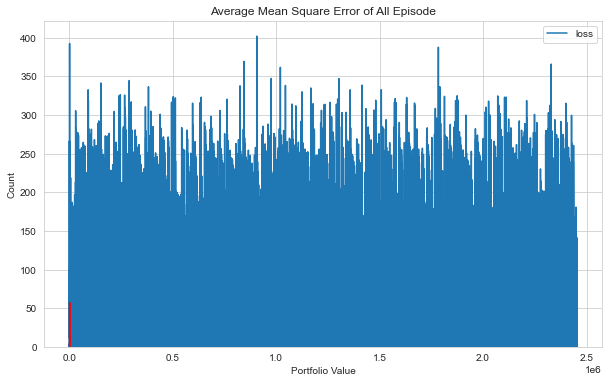

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

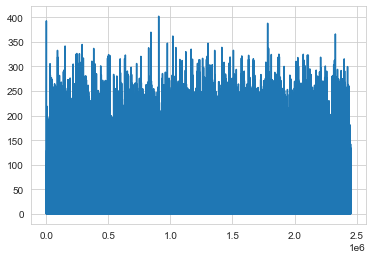

In [5]:
plt.plot(agent.model.losses)

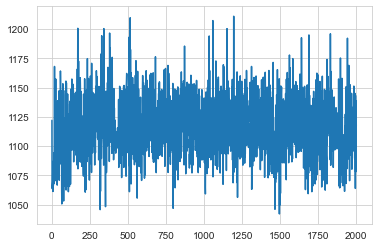

In [6]:
plt.plot(portfolio_value)

episode end value: 1102.18, duration: 0:00:00.103022
Sell: 398 times, Buy: 340 times


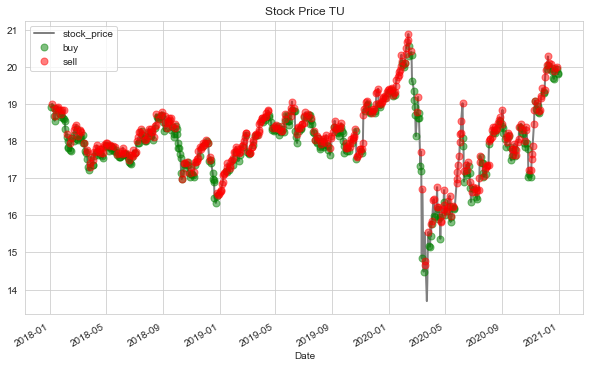

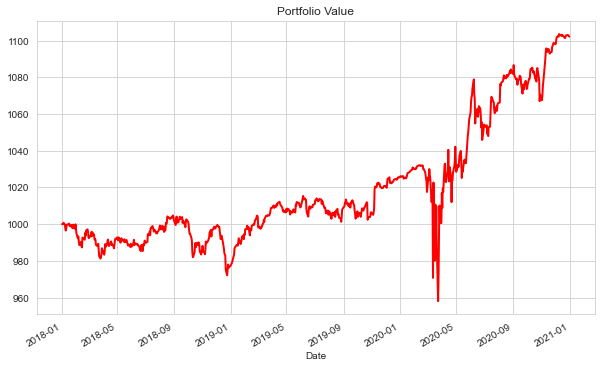

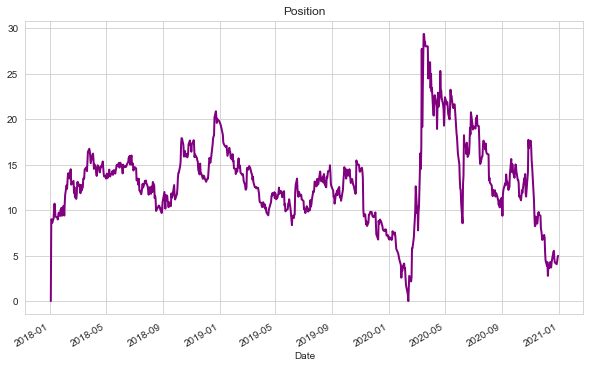

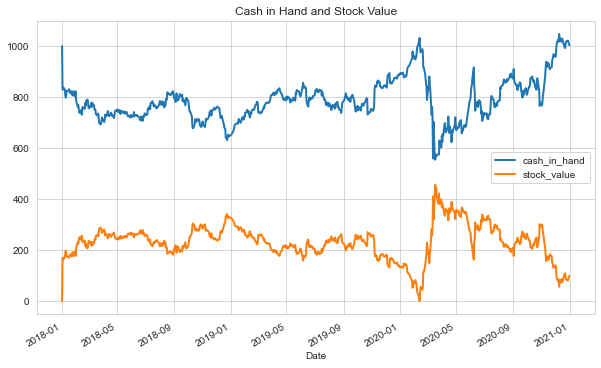

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: TU
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 3.30 %
Volatility: 0.0740
shape ratio: 0.2966
Maximun drawdown: -7.17 %
Calmar ratio: 0.4596
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 1.53 %
Volatility (benchmark): 0.2349
shape ratio: 0.0182
Maximun drawdown: -34.45 %
Calmar ratio (benchmark): 0.0443


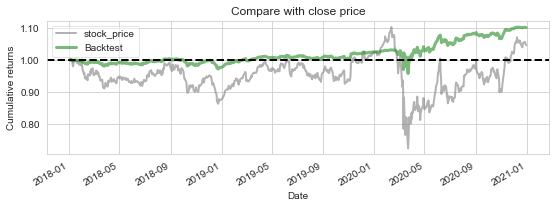

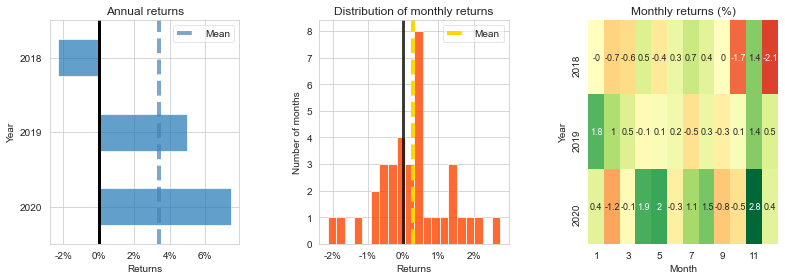

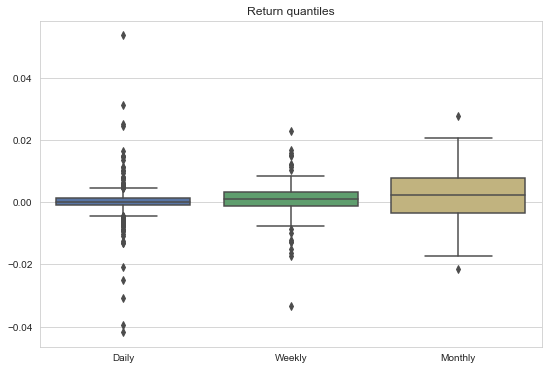

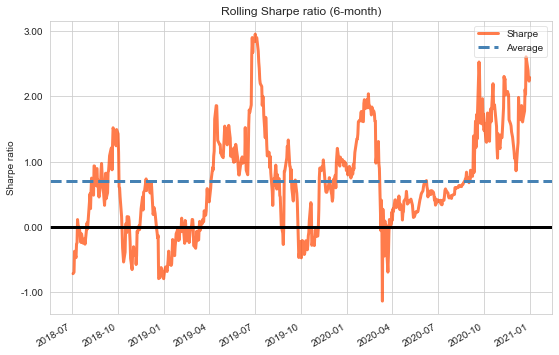

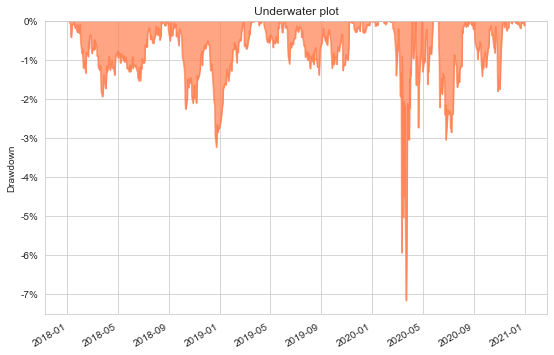

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')